# Landsile Susceptibility Assessment Using Machine Learning Technique (Combination Model of Logistic Regression-Frequency Ratio)

## Case Study in Pacet District, Mojokerto Regency, East Java Province, Indonesia
    
    

## Part 01 - Preparing Parameter Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from osgeo import gdal, osr
import geopandas as gpd
#import rasterio as rs
#from rasterio import plot
import matplotlib.gridspec as gridspec

In [2]:
# Calling The Data Using GDAL
Elevasi = gdal.Open(r'Elevasi.tif')
Slope = gdal.Open(r'Slope.tif')
Aspect = gdal.Open(r'Aspect.tif')
TWI = gdal.Open(r'TWI.tif')
TPI = gdal.Open(r'TPI.tif')
SPI = gdal.Open(r'SPI.tif')
PrC = gdal.Open(r'PrC.tif')
DtR = gdal.Open(r'DtR.tif')
DtD = gdal.Open(r'DtD.tif')
Rf = gdal.Open(r'Rainfall.tif')
Soil = gdal.Open(r'Soil.tif')
LU = gdal.Open(r'LU.tif')
BL = gdal.Open(r'BL.tif')
UL = gdal.Open(r'UL.tif')

# Change Raster into Array
ArrElevasi = Elevasi.GetRasterBand(1).ReadAsArray()
ArrSlope = Slope.GetRasterBand(1).ReadAsArray()
ArrAspect = Aspect.GetRasterBand(1).ReadAsArray()
ArrPrC = PrC.GetRasterBand(1).ReadAsArray()
ArrSPI = SPI.GetRasterBand(1).ReadAsArray()
ArrTPI = TPI.GetRasterBand(1).ReadAsArray()
ArrTWI = TWI.GetRasterBand(1).ReadAsArray()
ArrDtR = DtR.GetRasterBand(1).ReadAsArray()
ArrDtD = DtD.GetRasterBand(1).ReadAsArray()
ArrSoil = Soil.GetRasterBand(1).ReadAsArray()
ArrRf = Rf.GetRasterBand(1).ReadAsArray()
ArrLU = LU.GetRasterBand(1).ReadAsArray()
ArrBL = BL.GetRasterBand(1).ReadAsArray()
ArrUL = UL.GetRasterBand(1).ReadAsArray()

### 1. Elevasi

In [3]:
!gdalinfo -stats Elevasi.tif

Driver: GTiff/GeoTIFF
Files: Elevasi.tif
       Elevasi.tif.aux.xml
Size is 706, 1312
Coordinate System is:
PROJCS["WGS 84 / UTM zone 49S",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",111],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32749"]]
Origin = (665836.843800000031479,9160318.750000000000000)
Pixel Size = (12.500000000000000,-12.500000000000000)
Metad

In [4]:
pdElevasi = pd.DataFrame(ArrElevasi)
pdElevasi

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1308,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1309,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1310,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [5]:
pdElevasi01 = pdElevasi.replace(-9999, np.nan)
pdElevasi01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


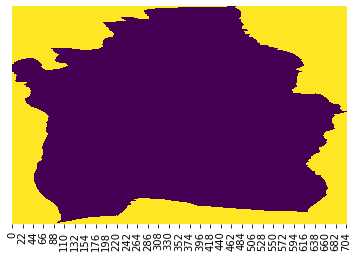

In [6]:
sns.heatmap(pdElevasi01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# Count Non-Nulls Value = Total Pixcel in Entire Map
N1 = pdElevasi01.notnull().sum().sum()
N1

634629

### 2. Slope

In [8]:
!gdalinfo -stats Slope.tif

Driver: GTiff/GeoTIFF
Files: Slope.tif
       Slope.tif.aux.xml
Size is 706, 1312
Coordinate System is:
PROJCS["WGS 84 / UTM zone 49S",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",111],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32749"]]
Origin = (665836.843800000031479,9160318.750000000000000)
Pixel Size = (12.500000000000000,-12.500000000000000)
Metadata:

In [9]:
pdSlope = pd.DataFrame(ArrSlope)
pdSlope

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1308,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1309,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1310,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [10]:
pdSlope01 = pdSlope.replace(-9999, np.nan)
pdSlope01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


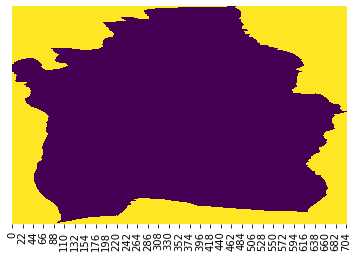

In [11]:
sns.heatmap(pdSlope01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
N2 = pdSlope01.notnull().sum().sum()
N2

634629

### 3. Aspect

In [13]:
!gdalinfo -stats Aspect.tif

Driver: GTiff/GeoTIFF
Files: Aspect.tif
       Aspect.tif.aux.xml
Size is 706, 1312
Coordinate System is:
PROJCS["WGS 84 / UTM zone 49S",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",111],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32749"]]
Origin = (665836.843800000031479,9160318.750000000000000)
Pixel Size = (12.500000000000000,-12.500000000000000)
Metadat

In [14]:
pdAspect = pd.DataFrame(ArrAspect)
pdAspect

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1308,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1309,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1310,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [15]:
pdAspect01 = pdAspect.replace(-9999, np.nan)
pdAspect01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#pdAspect02 = pdAspect01.replace(361-393.247, 0)
#pdAspect02

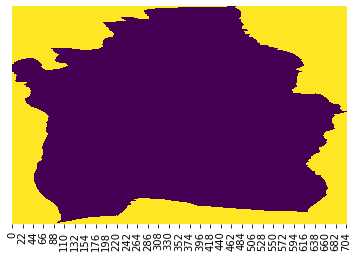

In [17]:
sns.heatmap(pdAspect01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
N3 = pdAspect01.notnull().sum().sum()
N3

634629

### 4.Topographic Wetness Index

In [19]:
!gdalinfo -stats TWI.tif

Driver: GTiff/GeoTIFF
Files: TWI.tif
       TWI.tif.aux.xml
Size is 706, 1312
Coordinate System is:
PROJCS["WGS 84 / UTM zone 49S",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",111],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32749"]]
Origin = (665836.843800000031479,9160318.750000000000000)
Pixel Size = (12.500000000000000,-12.500000000000000)
Metadata:
  A

In [20]:
pdTWI = pd.DataFrame(ArrTWI)
pdTWI

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1308,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1309,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1310,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [21]:
pdTWI01 = pdTWI.replace(-9999, np.nan)
pdTWI01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


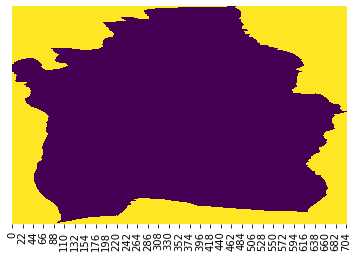

In [22]:
sns.heatmap(pdTWI01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
N4 = pdTWI01.notnull().sum().sum()
N4

634629

### 5.Topographic Position Index

In [24]:
!gdalinfo -stats TPI.tif

Driver: GTiff/GeoTIFF
Files: TPI.tif
       TPI.tif.aux.xml
Size is 706, 1312
Coordinate System is:
PROJCS["WGS 84 / UTM zone 49S",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",111],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32749"]]
Origin = (665836.843800000031479,9160318.750000000000000)
Pixel Size = (12.500000000000000,-12.500000000000000)
Metadata:
  A

In [25]:
pdTPI = pd.DataFrame(ArrTPI)
pdTPI

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1308,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1309,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1310,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [26]:
pdTPI01 = pdTPI.replace(-9999, np.nan)
pdTPI01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


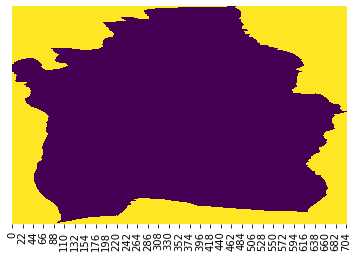

In [27]:
sns.heatmap(pdTPI01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
N5 = pdTPI01.notnull().sum().sum()
N5

634629

### 6. Stream Power Index

In [29]:
!gdalinfo -stats SPI.tif

Driver: GTiff/GeoTIFF
Files: SPI.tif
       SPI.tif.aux.xml
Size is 706, 1312
Coordinate System is:
PROJCS["WGS 84 / UTM zone 49S",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",111],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32749"]]
Origin = (665836.843800000031479,9160318.750000000000000)
Pixel Size = (12.500000000000000,-12.500000000000000)
Metadata:
  A

In [30]:
pdSPI = pd.DataFrame(ArrSPI)
pdSPI

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1308,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1309,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1310,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [31]:
pdSPI01 = pdSPI.replace(-9999, np.nan)
pdSPI01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


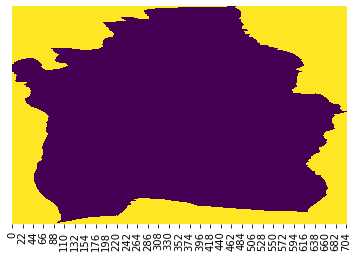

In [32]:
sns.heatmap(pdSPI01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
N6 = pdSPI01.notnull().sum().sum()
N6

634629

### 7. Profile Curvature

In [34]:
!gdalinfo -stats PrC.tif

Driver: GTiff/GeoTIFF
Files: PrC.tif
       PrC.tif.aux.xml
Size is 706, 1312
Coordinate System is:
PROJCS["WGS 84 / UTM zone 49S",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",111],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32749"]]
Origin = (665836.843800000031479,9160318.750000000000000)
Pixel Size = (12.500000000000000,-12.500000000000000)
Metadata:
  A

In [35]:
pdPrC = pd.DataFrame(ArrPrC)
pdPrC

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1308,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1309,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1310,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [36]:
pdPrC01 = pdPrC.replace(-9999, np.nan)
pdPrC01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


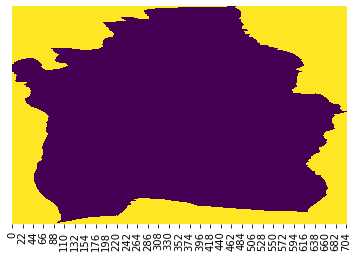

In [37]:
sns.heatmap(pdPrC01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
N7 = pdPrC01.notnull().sum().sum()
N7

634629

### 8. Distance to Road

In [39]:
!gdalinfo -stats DtR.tif

Driver: GTiff/GeoTIFF
Files: DtR.tif
       DtR.tif.aux.xml
Size is 892, 1463
Coordinate System is:
PROJCS["WGS 84 / UTM zone 49S",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",111],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32749"]]
Origin = (664561.873400000040419,9161331.248199999332428)
Pixel Size = (12.500000000000000,-12.500000000000000)
Metadata:
  A

In [40]:
pdDtR = pd.DataFrame(ArrDtR)
pdDtR

,0,1,2,3,4,5,6,7,8,9,...,882,883,884,885,886,887,888,889,890,891
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1459,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1460,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1461,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [41]:
pdDtR01 = pdDtR.replace(-9999, np.nan)
pdDtR01

,0,1,2,3,4,5,6,7,8,9,...,882,883,884,885,886,887,888,889,890,891
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


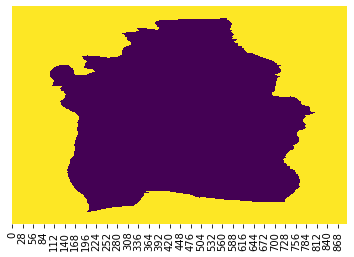

In [42]:
sns.heatmap(pdDtR01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [43]:
N8 = pdDtR01.notnull().sum().sum()
N8

634629

### 9. Distance to Drainage

In [44]:
!gdalinfo -stats DtD.tif

Driver: GTiff/GeoTIFF
Files: DtD.tif
       DtD.tif.aux.xml
Size is 892, 1463
Coordinate System is:
PROJCS["WGS 84 / UTM zone 49S",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",111],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32749"]]
Origin = (664561.883499999996275,9161331.248099999502301)
Pixel Size = (12.500000000000000,-12.500000000000000)
Metadata:
  A

In [45]:
pdDtD = pd.DataFrame(ArrDtD)
pdDtD

,0,1,2,3,4,5,6,7,8,9,...,882,883,884,885,886,887,888,889,890,891
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1459,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1460,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1461,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [46]:
pdDtD01 = pdDtD.replace(-9999, np.nan)
pdDtD01

,0,1,2,3,4,5,6,7,8,9,...,882,883,884,885,886,887,888,889,890,891
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


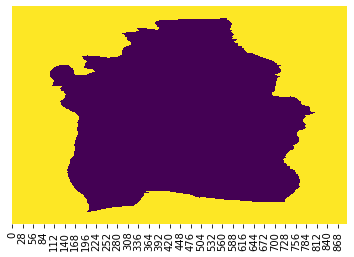

In [47]:
sns.heatmap(pdDtD01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
N9 = pdDtD01.notnull().sum().sum()
N9

634629

### 10. Rainfall

In [49]:
!gdalinfo -stats Rainfall.tif

Driver: GTiff/GeoTIFF
Files: Rainfall.tif
       Rainfall.tif.aux.xml
Size is 892, 1463
Coordinate System is:
PROJCS["WGS 84 / UTM zone 49S",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",111],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32749"]]
Origin = (664561.883499999996275,9161331.248099999502301)
Pixel Size = (12.500000000000000,-12.500000000000000)
Met

In [50]:
pdRf = pd.DataFrame(ArrRf)
pdRf

,0,1,2,3,4,5,6,7,8,9,...,882,883,884,885,886,887,888,889,890,891
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1459,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1460,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1461,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [51]:
pdRf01 = pdRf.replace(-9999.0, np.nan)
pdRf01

,0,1,2,3,4,5,6,7,8,9,...,882,883,884,885,886,887,888,889,890,891
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


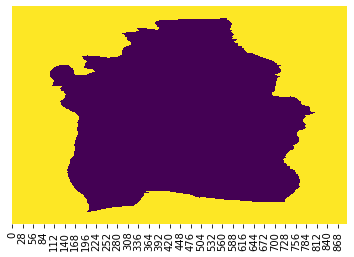

In [52]:
sns.heatmap(pdRf01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [53]:
N10 = pdRf01.notnull().sum().sum()
N10

634629

### 11. Soil

In [54]:
!gdalinfo -stats Soil.tif

Driver: GTiff/GeoTIFF
Files: Soil.tif
       Soil.tif.aux.xml
Size is 706, 1312
Coordinate System is:
PROJCS["WGS 84 / UTM zone 49S",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",111],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32749"]]
Origin = (665836.843800000031479,9160318.750000000000000)
Pixel Size = (12.500000000000000,-12.500000000000000)
Metadata:
 

In [55]:
pdSoil = pd.DataFrame(ArrSoil)
pdSoil

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1308,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1309,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1310,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [56]:
pdSoil01 = pdSoil.replace(255, np.nan)
pdSoil01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


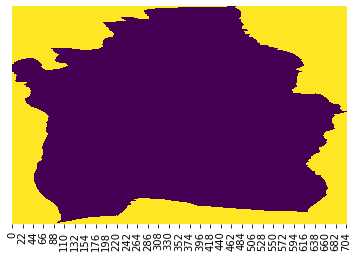

In [57]:
sns.heatmap(pdSoil01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [58]:
N11 = pdSoil01.notnull().sum().sum()
N11

634629

### 12. Land Use

In [59]:
!gdalinfo -stats LU.tif

Driver: GTiff/GeoTIFF
Files: LU.tif
       LU.tif.aux.xml
Size is 706, 1312
Coordinate System is:
PROJCS["WGS 84 / UTM zone 49S",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",111],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32749"]]
Origin = (665836.843800000031479,9160318.750000000000000)
Pixel Size = (12.500000000000000,-12.500000000000000)
Metadata:
  ARE

In [60]:
pdLU = pd.DataFrame(ArrLU)
pdLU

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1308,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1309,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1310,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [61]:
pdLU01 = pdLU.replace(-9999, np.nan)
pdLU01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


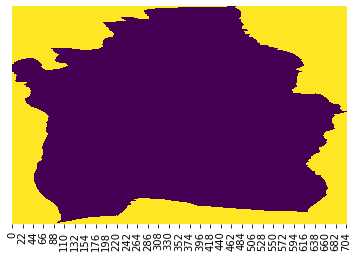

In [62]:
sns.heatmap(pdLU01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [63]:
N12 = pdLU01.notnull().sum().sum()
N12

634629

### 13 Bentuklahan

In [64]:
!gdalinfo -stats BL.tif

Driver: GTiff/GeoTIFF
Files: BL.tif
       BL.tif.aux.xml
Size is 706, 1312
Coordinate System is:
PROJCS["WGS 84 / UTM zone 49S",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",111],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32749"]]
Origin = (665836.843800000031479,9160318.750000000000000)
Pixel Size = (12.500000000000000,-12.500000000000000)
Metadata:
  ARE

In [65]:
pdBL = pd.DataFrame(ArrBL)
pdBL

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
pdBL01 = pdBL.replace(0, np.nan)
pdBL01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


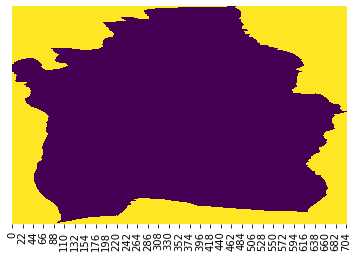

In [67]:
sns.heatmap(pdBL01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [68]:
N13 = pdBL01.notnull().sum().sum()
N13

634629

### 14 Unit Lahan

In [69]:
!gdalinfo -stats UL.tif

Driver: GTiff/GeoTIFF
Files: UL.tif
       UL.tif.aux.xml
Size is 706, 1312
Coordinate System is:
PROJCS["WGS 84 / UTM zone 49S",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",111],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32749"]]
Origin = (665836.843800000031479,9160318.750000000000000)
Pixel Size = (12.500000000000000,-12.500000000000000)
Metadata:
  ARE

In [70]:
pdUL = pd.DataFrame(ArrUL)
pdUL

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
pdUL01 = pdUL.replace(0, np.nan)
pdUL01

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


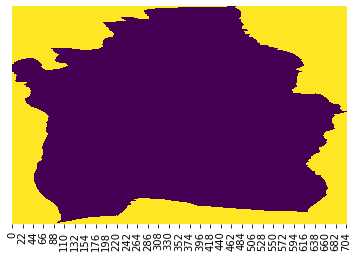

In [72]:
sns.heatmap(pdBL01.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [73]:
N14 = pdUL01.notnull().sum().sum()
N14

634629

In [74]:
# Checking All Parameters Data Values

Checking = pd.DataFrame({'Parameter': ['Elevation','Slope', 'Aspect', 'Topographic Wetness Index',
                                       'Topographic Position Index', 'Slope Power Index', 'Profile Curvature',
                                       'Distance to Road', 'Disrtance to Drainage', 'Rainfall', 'Soil', 'Land Use','Bentuklahan',
                                      'Unit Lahan'],
                         'Nilai Pixcel': [N1, N2, N3, N4, N5, N6,
                                 N7,N8,N9,N10,N11,N12,N13,N14],
                        'T/F': [N1==634629, N2==634629, N3==634629, N4==634629, N5==634629, N6==634629,
                                 N7==634629,N8==634629,N9==634629,N10==634629,N11==634629,N12==634629,N13==634629,N14==634629],
                        'Selisih': [N1-634629, N2-634629, N3-634629, N4-634629, N5-634629, N6-634629,
                                 N7-634629,N8-634629,N9-634629,N10-634629,N11-634629,N12-634629,N13-634629,N14-634629]},
                         index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
Checking

,Parameter,Nilai Pixcel,T/F,Selisih
1,Elevation,634629,True,0
2,Slope,634629,True,0
3,Aspect,634629,True,0
4,Topographic Wetness Index,634629,True,0
5,Topographic Position Index,634629,True,0
6,Slope Power Index,634629,True,0
7,Profile Curvature,634629,True,0
8,Distance to Road,634629,True,0
9,Disrtance to Drainage,634629,True,0
10,Rainfall,634629,True,0


## Part 02 - Normalized Factor's Value Using Frequency Ratio

### Lvci : Number of Grid Cells with Landslide for Each class

In [75]:
Dataset = pd.read_excel(r'Lvci Skripsi.xlsx')
Dataset

,Sumber,L,Unit Lahan,TWI,TPI,SPI,Tanah,Slope,Rainfall,PrC,LU,Elevasi,DtR,DtD,Bentuklahan,Aspect
0,Citra Google Earth,1,26,2,4,2,3,4,4,3,2,4,4,1,11,9
1,Citra Google Earth,1,26,2,4,2,3,5,4,3,2,4,4,1,11,8
2,Citra Google Earth,1,26,4,3,2,3,3,4,2,2,4,4,1,11,9
3,Citra Google Earth,1,26,3,3,2,3,4,4,1,2,3,4,1,11,9
4,BPBD Kab. Mojokerto,1,10,3,3,2,3,4,3,1,4,2,3,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Citra Google Earth,1,22,3,3,4,4,5,4,3,3,6,5,1,8,9
379,Citra Google Earth,1,21,3,3,4,4,5,4,1,2,6,5,2,8,9
380,Citra Google Earth,1,37,3,3,2,3,5,4,1,2,2,2,1,13,3
381,Citra Google Earth,1,30,2,3,2,5,5,4,2,2,2,3,1,12,8


In [76]:
# 01 Rainfall
print('Total Pixel Rainfall:', Dataset["Rainfall"].count())
a = pd.value_counts(Dataset["Rainfall"])
a

Total Pixel Rainfall: 383


4    302
3     81
Name: Rainfall, dtype: int64

In [77]:
# 02 Aspect
print('Total Pixel Aspect:', Dataset["Aspect"].count())
a = pd.value_counts(Dataset["Aspect"])
a

Total Pixel Aspect: 383


2    126
3     89
9     72
4     54
8     19
5     16
7      6
6      1
Name: Aspect, dtype: int64

In [78]:
# 03 TPI
print('Total Pixel TPI:', Dataset["TPI"].count())
a = pd.value_counts(Dataset["TPI"])
a

Total Pixel TPI: 383


3    207
4    131
2     27
5     17
6      1
Name: TPI, dtype: int64

In [79]:
# 04 SPI
print('Total Pixel SPI:', Dataset["SPI"].count())
a = pd.value_counts(Dataset["SPI"])
a

Total Pixel SPI: 383


2    223
3    123
4     25
1     12
Name: SPI, dtype: int64

In [80]:
# 05 TWI
print('Total Pixel TWI:', Dataset["TWI"].count())
a = pd.value_counts(Dataset["TWI"])
a

Total Pixel TWI: 383


3    202
2    170
4     10
5      1
Name: TWI, dtype: int64

In [81]:
# 06 Tanah
print('Total Pixel Tanah:', Dataset["Tanah"].count())
a = pd.value_counts(Dataset["Tanah"])
a

Total Pixel Tanah: 383


3    194
5    105
1     53
4     31
Name: Tanah, dtype: int64

In [82]:
# 07 Distance to Road
print('Total Pixel Distance to Road:', Dataset["DtR"].count())
a = pd.value_counts(Dataset["DtR"])
a

Total Pixel Distance to Road: 383


4    138
3    121
5     52
1     44
2     28
Name: DtR, dtype: int64

In [83]:
#CATATAN MINOR
# 08 Distance to Drainage
print('Total Pixel Distance to Drainage:', Dataset["DtD"].count())
a = pd.value_counts(Dataset["DtD"])
a

Total Pixel Distance to Drainage: 383


1    249
2     98
3     30
5      4
4      2
Name: DtD, dtype: int64

In [84]:
# 09 Slope
print('Total Pixel Slope:', Dataset["Slope"].count())
a = pd.value_counts(Dataset["Slope"])
a

Total Pixel Slope: 383


5    214
4     90
6     63
3     15
7      1
Name: Slope, dtype: int64

In [85]:
# 10 Elevasi
print('Total Pixel Elevasi:', Dataset["Elevasi"].count())
a = pd.value_counts(Dataset["Elevasi"])
a

Total Pixel Elevasi: 383


3    138
2    105
4     95
6     25
5     20
Name: Elevasi, dtype: int64

In [86]:
# 11 Profile Curvature
print('Total Pixel Profile Curvature:', Dataset["PrC"].count())
a = pd.value_counts(Dataset["PrC"])
a

Total Pixel Profile Curvature: 383


3    195
1    165
2     23
Name: PrC, dtype: int64

In [87]:
# 12 LU
print('Total Pixel Profile Land Use:', Dataset["LU"].count())
a = pd.value_counts(Dataset["LU"])
a

Total Pixel Profile Land Use: 383


2    282
4     67
3     29
1      4
5      1
Name: LU, dtype: int64

In [88]:
# 13 Bentuklahan
print('Total Pixel Profile Bentuklahan:', Dataset["Bentuklahan"].count())
a = pd.value_counts(Dataset["Bentuklahan"])
a

Total Pixel Profile Bentuklahan: 383


11    169
3      52
10     39
12     34
4      32
13     24
5      13
2       7
8       5
9       4
7       2
6       2
Name: Bentuklahan, dtype: int64

In [89]:
# 14 Unit Lahan
print('Total Pixel Profile Unit Lahan:', Dataset["Unit Lahan"].count())
a = pd.value_counts(Dataset["Unit Lahan"])
a

Total Pixel Profile Unit Lahan: 383


26    125
32     41
24     25
13     24
6      23
37     21
30     18
33     15
25     14
8      13
7       8
14      8
16      7
10      6
18      6
3       6
23      4
39      3
21      3
27      3
19      2
9       2
22      2
20      2
35      1
4       1
Name: Unit Lahan, dtype: int64

### Ls : Total Number of Grid Cells with Landsilde

In [90]:
Dataset.count()

Sumber         383
L              383
Unit Lahan     383
TWI            383
TPI            383
SPI            383
Tanah          383
Slope          383
Rainfall       383
PrC            383
LU             383
Elevasi        383
DtR            383
DtD            383
Bentuklahan    383
Aspect         383
dtype: int64

### Aci : Number Grid Class for Each Parameter Landslide

In [91]:
from simpledbf import Dbf5

In [92]:
Aspect = Dbf5(r'C:/Users/LENOVO/Pacet Landslides Susceptibility-Machine Learning/Dbf/Aspect.dbf')
DtD = Dbf5(r'C:/Users/LENOVO/Pacet Landslides Susceptibility-Machine Learning/Dbf/DtD.dbf')
DtR = Dbf5(r'C:/Users/LENOVO/Pacet Landslides Susceptibility-Machine Learning/Dbf/DtR.dbf')
Elevasi = Dbf5(r'C:/Users/LENOVO/Pacet Landslides Susceptibility-Machine Learning/Dbf/Elevasi.dbf')
Tanah = Dbf5(r'C:/Users/LENOVO/Pacet Landslides Susceptibility-Machine Learning/Dbf/Tanah.dbf')
LU = Dbf5(r'C:/Users/LENOVO/Pacet Landslides Susceptibility-Machine Learning/Dbf/LU.dbf')
PrC = Dbf5(r'C:/Users/LENOVO/Pacet Landslides Susceptibility-Machine Learning/Dbf/PrC.dbf')
Rainfall = Dbf5(r'C:/Users/LENOVO/Pacet Landslides Susceptibility-Machine Learning/Dbf/Rainfall.dbf')
Slope = Dbf5(r'C:/Users/LENOVO/Pacet Landslides Susceptibility-Machine Learning/Dbf/Slope.dbf')
SPI = Dbf5(r'C:/Users/LENOVO/Pacet Landslides Susceptibility-Machine Learning/Dbf/SPI.dbf')
TPI = Dbf5(r'C:/Users/LENOVO/Pacet Landslides Susceptibility-Machine Learning/Dbf/TPI.dbf')
TWI = Dbf5(r'C:/Users/LENOVO/Pacet Landslides Susceptibility-Machine Learning/Dbf/TWI.dbf')
Bentuklahan = Dbf5(r'C:/Users/LENOVO/Pacet Landslides Susceptibility-Machine Learning/Dbf/Bentuklahan.dbf')
Unit_Lahan = Dbf5(r'C:/Users/LENOVO/Pacet Landslides Susceptibility-Machine Learning/Dbf/Unit Lahan.dbf')


Aspect = Aspect.to_dataframe()
DtD = DtD.to_dataframe()
DtR = DtR.to_dataframe()
Elevasi = Elevasi.to_dataframe()
Tanah = Tanah.to_dataframe()
LU = LU.to_dataframe()
Slope = Slope.to_dataframe()
SPI = SPI.to_dataframe()
TPI = TPI.to_dataframe()
TWI = TWI.to_dataframe()
Rainfall = Rainfall.to_dataframe()
PrC = PrC.to_dataframe()
Bentuklahan = Bentuklahan.to_dataframe()
Unit_Lahan = Unit_Lahan.to_dataframe()

In [93]:
# 01 Rainfall
print('Total Pixel Aspect:', Rainfall["Rainfall"].count())
a = pd.value_counts(Rainfall["Rainfall"])
a

Total Pixel Aspect: 634629


4.0    320443
3.0    197164
2.0     66077
1.0     50945
Name: Rainfall, dtype: int64

In [94]:
# 02 Aspect
print('Total Pixel Aspect:', Aspect["Aspect"].count())
a = pd.value_counts(Aspect["Aspect"])
a

Total Pixel Aspect: 634629


9.0    172034
2.0    144026
8.0    105927
3.0    100420
4.0     55717
7.0     34049
5.0     15729
6.0      6256
1.0       471
Name: Aspect, dtype: int64

In [95]:
# 03 TPI
print('Total Pixel TPI:', TPI["TPI"].count())
a = pd.value_counts(TPI["TPI"])
a

Total Pixel TPI: 634629


3.0    424473
4.0    165909
2.0     31296
5.0      9744
1.0      2281
6.0       926
Name: TPI, dtype: int64

In [96]:
# 04 SPI
print('Total Pixel SPI:', SPI["SPI"].count())
a = pd.value_counts(SPI["SPI"])
a

Total Pixel SPI: 634629


1.0    248978
2.0    235112
3.0    118412
4.0     32127
Name: SPI, dtype: int64

In [97]:
# 05 TWI
print('Total Pixel TWI:', TWI["TWI"].count())
a = pd.value_counts(TWI["TWI"])
a

Total Pixel TWI: 634629


3.0    412158
2.0    173139
4.0     44089
5.0      5226
1.0        17
Name: TWI, dtype: int64

In [98]:
# 06 Soil
print('Total Pixel Soil:', Tanah["Tanah"].count())
a = pd.value_counts(Tanah["Tanah"])
a

Total Pixel Soil: 634629


5.0    282280
3.0    144191
1.0     95389
4.0     68665
2.0     44104
Name: Tanah, dtype: int64

In [99]:
# 07 Distance to Road
print('Total Pixel Distance to Road:', DtR["DtR"].count())
a = pd.value_counts(DtR["DtR"])
a

Total Pixel Distance to Road: 634629


4.0    163160
3.0    157622
5.0    128143
1.0    107901
2.0     77803
Name: DtR, dtype: int64

In [100]:
# 08 Distance to Drainage
print('Total Pixel Distance to Drainage:', DtD["DtD"].count())
a = pd.value_counts(DtD["DtD"])
a

Total Pixel Distance to Drainage: 634629


1.0    336892
2.0    195019
3.0     95873
4.0      4968
5.0      1877
Name: DtD, dtype: int64

In [101]:
# 09 Slope
print('Total Pixel Slope:', Slope["Slope"].count())
a = pd.value_counts(Slope["Slope"])
a

Total Pixel Slope: 634629


5.0    209487
4.0    170472
3.0    150953
2.0     51529
6.0     34183
1.0     17048
7.0       957
Name: Slope, dtype: int64

In [102]:
# 10 Elevasi
print('Total Pixel Elevasi:', Elevasi["Elevasi"].count())
a = pd.value_counts(Elevasi["Elevasi"])
a

Total Pixel Elevasi: 634629


2.0    171390
1.0    162085
3.0    102166
6.0     81267
4.0     78722
5.0     38999
Name: Elevasi, dtype: int64

In [103]:
# 11 Profile Curvature
print('Total Pixel Profile Curvature:', PrC["PrC"].count())
a = pd.value_counts(PrC["PrC"])
a

Total Pixel Profile Curvature: 634629


1.0    275081
3.0    271842
2.0     87706
Name: PrC, dtype: int64

In [104]:
# 12 LU
print('Total Pixel Profile Land Use:', LU["LU"].count())
a = pd.value_counts(LU["LU"])
a

Total Pixel Profile Land Use: 634629


4.0    276611
2.0    255264
3.0     59042
5.0     40611
1.0      3101
Name: LU, dtype: int64

In [105]:
# 13 Bentuklahan
print('Total Pixel Bentuklahan:', Bentuklahan["Bentuklaha"].count())
a = pd.value_counts(Bentuklahan["Bentuklaha"])
a

Total Pixel Bentuklahan: 634629


13.0    202285
12.0     80158
10.0     79792
3.0      71423
11.0     64054
8.0      40139
4.0      26059
5.0      24692
2.0      18871
1.0      14909
9.0       9176
7.0       2607
6.0        464
Name: Bentuklaha, dtype: int64

In [106]:
# 14 LUnit Lahan
print('Total Pixel Unit Lahan:', Unit_Lahan["Unit Lahan"].count())
a = pd.value_counts(Unit_Lahan["Unit Lahan"])
a

Total Pixel Unit Lahan: 634629


39.0    155750
24.0     49754
31.0     39674
26.0     39061
25.0     30038
6.0      29603
41.0     23958
21.0     22995
14.0     20404
32.0     18852
7.0      17870
22.0     17144
30.0     16977
33.0     15024
38.0     14466
8.0      13302
1.0      13229
4.0      10962
16.0      9862
23.0      9176
18.0      8871
3.0       7416
10.0      6124
13.0      5655
28.0      4191
37.0      3976
40.0      3862
35.0      3586
15.0      3581
11.0      3083
20.0      2607
29.0      2597
17.0      2378
34.0      2256
27.0      1994
2.0       1680
9.0        792
12.0       649
5.0        493
19.0       464
36.0       273
Name: Unit Lahan, dtype: int64

### As : Number of Grid Cells Covering the Whole Area

In [107]:
print("Number of Grid Cells Covering The Whole Area:", pdBL01.notnull().sum().sum())

Number of Grid Cells Covering The Whole Area: 634629


## Part 03 - Training Dataset and Testing Dataset Preparation

In [108]:
Dataset = pd.read_excel(r'Training Dataset & Testing Dataset Skripsi.xlsx')
Dataset

,Sumber,L,PrC,Rainfall,LU,SPI,Tanah,DtR,DtD,TWI,TPI,Elevasi,Slope,Bentuklahan,Unit Lahan,Aspect
0,Citra Google Earth,1,1.00,1.00,0.85,0.91,1.00,1.00,1.00,1.00,0.45,0.61,0.29,0.61,0.61,0.41
1,Citra Google Earth,1,1.00,1.00,0.85,0.91,1.00,1.00,1.00,1.00,0.45,0.61,0.55,0.61,0.61,0.18
2,Citra Google Earth,1,0.00,1.00,0.85,0.91,1.00,1.00,1.00,0.23,0.28,0.61,0.05,0.61,0.61,0.41
3,Citra Google Earth,1,0.74,1.00,0.85,0.91,1.00,1.00,1.00,0.50,0.28,0.38,0.29,0.61,0.61,0.41
4,BPBD Kab. Mojokerto,1,0.74,0.44,0.17,0.91,1.00,0.84,1.00,0.50,0.28,0.14,0.29,0.17,0.19,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,NaN,0,0.00,1.00,0.85,0.00,0.41,0.10,1.00,0.50,0.28,0.61,0.00,0.11,0.10,0.16
762,NaN,0,0.00,0.44,0.00,0.00,1.00,0.10,1.00,0.50,0.28,0.00,0.05,0.00,0.00,0.18
763,NaN,0,0.74,0.44,0.00,0.00,0.28,0.00,0.67,0.50,0.28,0.14,0.00,0.03,0.00,0.17
764,NaN,0,0.74,0.44,0.00,0.00,0.28,0.10,1.00,0.50,0.28,0.14,0.00,0.03,0.00,0.18


In [109]:
Dataset.count()

Sumber         743
L              766
PrC            766
Rainfall       766
LU             766
SPI            766
Tanah          766
DtR            766
DtD            766
TWI            766
TPI            766
Elevasi        766
Slope          766
Bentuklahan    766
Unit Lahan     766
Aspect         766
dtype: int64

In [110]:
#Split the dataset

from sklearn.model_selection import train_test_split

In [111]:
Dataset.head(2)

,Sumber,L,PrC,Rainfall,LU,SPI,Tanah,DtR,DtD,TWI,TPI,Elevasi,Slope,Bentuklahan,Unit Lahan,Aspect
0,Citra Google Earth,1,1.0,1.0,0.85,0.91,1.0,1.0,1.0,1.0,0.45,0.61,0.29,0.61,0.61,0.41
1,Citra Google Earth,1,1.0,1.0,0.85,0.91,1.0,1.0,1.0,1.0,0.45,0.61,0.55,0.61,0.61,0.18


In [112]:
X = Dataset[['TWI','TPI','SPI','Tanah','Slope','Bentuklahan','LU','Rainfall','PrC','Elevasi','DtR','DtD','Aspect']]
y = Dataset['L']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [113]:
X_train.head()

,TWI,TPI,SPI,Tanah,Slope,Bentuklahan,LU,Rainfall,PrC,Elevasi,DtR,DtD,Aspect
626,0.5,0.28,0.00,0.28,0.00,0.03,0.17,0.44,1.00,0.14,0.00,0.67,0.17
69,1.0,0.28,1.00,1.00,1.00,0.61,0.85,1.00,0.74,0.38,1.00,1.00,0.86
665,1.0,0.45,0.00,0.28,0.00,0.03,0.17,0.00,1.00,0.00,0.84,0.67,0.87
492,0.5,0.28,0.00,1.00,0.05,0.03,0.00,0.00,1.00,0.00,0.00,0.43,0.41
97,1.0,1.00,0.91,1.00,0.29,0.61,0.85,1.00,1.00,0.38,0.84,0.67,0.87


In [114]:
X_test

,TWI,TPI,SPI,Tanah,Slope,Bentuklahan,LU,Rainfall,PrC,Elevasi,DtR,DtD,Aspect
143,1.0,0.45,0.91,0.28,0.55,0.03,0.85,0.44,1.00,0.14,0.84,1.00,0.95
604,0.5,0.28,0.00,1.00,0.05,0.03,0.00,0.00,1.00,0.00,0.10,0.43,0.41
194,0.5,0.45,0.91,1.00,0.29,0.61,0.85,1.00,1.00,0.38,0.84,1.00,0.87
196,1.0,1.00,0.91,1.00,0.55,0.61,0.17,1.00,1.00,0.38,0.84,0.67,0.87
392,0.5,0.28,0.00,1.00,0.29,0.03,0.17,0.00,1.00,0.00,0.84,0.67,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,0.5,0.28,0.00,0.28,0.05,0.03,0.17,0.00,0.74,0.00,1.00,0.67,0.41
407,0.5,0.28,0.00,1.00,0.00,0.03,0.17,0.00,1.00,0.00,0.84,1.00,0.16
303,1.0,0.45,1.00,0.28,0.55,0.61,0.85,1.00,0.74,0.61,1.00,0.67,0.87
358,1.0,0.45,1.00,0.34,0.55,1.00,1.00,1.00,1.00,1.00,0.09,0.00,0.18


In [115]:
y_test

143    1
604    0
194    1
196    1
392    0
      ..
497    0
407    0
303    1
358    1
202    1
Name: L, Length: 230, dtype: int64

In [116]:
y_train

626    0
69     1
665    0
492    0
97     1
      ..
369    1
320    1
527    0
125    1
265    1
Name: L, Length: 536, dtype: int64

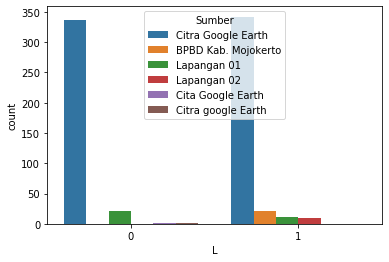

In [117]:
sns.countplot(x='L', data=Dataset, hue='Sumber')

## Part 04 - Preparing The Background Data

In [118]:
# Calling Shapefile using Geopandas as gpd

Background_Data = pd.read_excel(r'Background Data Skripsi.xlsx')

In [119]:
Background_Data.head()

,x,y,PrC,Rainfall,LU,SPI,Tanah,DtR,DtD,TWI,TPI,Elevasi,Slope,Bentuklahan,Unit Lahan,Aspect
0,671705.5938,9160312.5,0.74,0.0,0.17,0.0,0.28,1.0,1.0,0.50,0.28,0.0,0.29,0.03,0.0,0.41
1,671718.0938,9160312.5,0.74,0.0,0.17,0.0,0.28,1.0,1.0,0.23,0.28,0.0,0.05,0.03,0.0,0.86
2,671730.5938,9160312.5,0.74,0.0,0.17,0.0,0.28,1.0,1.0,0.23,0.28,0.0,0.05,0.03,0.0,0.86
3,671743.0938,9160312.5,1.00,0.0,0.17,0.0,0.28,1.0,1.0,0.23,0.28,0.0,0.05,0.03,0.0,0.41
4,671755.5938,9160312.5,0.74,0.0,0.17,0.0,0.28,1.0,1.0,0.50,0.28,0.0,0.05,0.03,0.0,0.95


In [120]:
BD = Background_Data[['TWI','TPI','SPI','Tanah','Slope','Bentuklahan','LU','Rainfall','PrC','Elevasi','DtR','DtD','Aspect']]
BD

,TWI,TPI,SPI,Tanah,Slope,Bentuklahan,LU,Rainfall,PrC,Elevasi,DtR,DtD,Aspect
0,0.50,0.28,0.00,0.28,0.29,0.03,0.17,0.0,0.74,0.0,1.00,1.00,0.41
1,0.23,0.28,0.00,0.28,0.05,0.03,0.17,0.0,0.74,0.0,1.00,1.00,0.86
2,0.23,0.28,0.00,0.28,0.05,0.03,0.17,0.0,0.74,0.0,1.00,1.00,0.86
3,0.23,0.28,0.00,0.28,0.05,0.03,0.17,0.0,1.00,0.0,1.00,1.00,0.41
4,0.50,0.28,0.00,0.28,0.05,0.03,0.17,0.0,0.74,0.0,1.00,1.00,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
634624,1.00,0.62,1.00,0.28,0.55,0.17,0.85,1.0,1.00,1.0,0.09,0.43,1.00
634625,1.00,0.45,0.74,0.28,1.00,0.17,0.85,1.0,1.00,1.0,0.09,0.43,0.18
634626,1.00,0.45,0.74,0.28,1.00,0.17,0.85,1.0,0.74,1.0,0.09,0.43,1.00
634627,1.00,0.28,0.74,0.28,0.57,0.17,0.85,1.0,1.00,1.0,0.09,0.43,0.16


## Part 05 - Logistic Regression Analysist

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
logmodel = LogisticRegression()

In [123]:
a = logmodel.fit(X_train, y_train)
a

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
#Make Prediction
prediction = logmodel.predict(X_test)

In [125]:
from sklearn.metrics import classification_report

In [126]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       114
           1       0.90      0.94      0.92       116

    accuracy                           0.92       230
   macro avg       0.92      0.92      0.92       230
weighted avg       0.92      0.92      0.92       230



In [127]:
X_train

,TWI,TPI,SPI,Tanah,Slope,Bentuklahan,LU,Rainfall,PrC,Elevasi,DtR,DtD,Aspect
626,0.5,0.28,0.00,0.28,0.00,0.03,0.17,0.44,1.00,0.14,0.00,0.67,0.17
69,1.0,0.28,1.00,1.00,1.00,0.61,0.85,1.00,0.74,0.38,1.00,1.00,0.86
665,1.0,0.45,0.00,0.28,0.00,0.03,0.17,0.00,1.00,0.00,0.84,0.67,0.87
492,0.5,0.28,0.00,1.00,0.05,0.03,0.00,0.00,1.00,0.00,0.00,0.43,0.41
97,1.0,1.00,0.91,1.00,0.29,0.61,0.85,1.00,1.00,0.38,0.84,0.67,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.5,0.28,0.91,0.28,0.55,0.61,0.85,1.00,1.00,0.61,1.00,0.43,0.86
320,0.5,0.28,0.91,0.28,0.29,0.10,0.17,0.44,1.00,0.14,0.10,1.00,0.95
527,0.5,0.28,0.00,1.00,0.00,0.03,0.17,0.00,0.74,0.00,0.84,0.67,0.86
125,0.5,0.28,1.00,0.41,0.55,0.61,0.85,1.00,1.00,0.61,1.00,1.00,0.86


In [128]:
y_train

626    0
69     1
665    0
492    0
97     1
      ..
369    1
320    1
527    0
125    1
265    1
Name: L, Length: 536, dtype: int64

In [129]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix(y_test, prediction)

array([[102,  12],
       [  7, 109]], dtype=int64)

In [130]:
true_positve_rate = 101/(101+7)
false_positve_rate = 1-(109/(109+13))

print('true positve rate =', true_positve_rate)
print('false positve rate =', false_positve_rate)

true positve rate = 0.9351851851851852
false positve rate = 0.10655737704918034


In [131]:
accuracy_score(y_test, prediction)

0.9173913043478261

In [132]:
import statsmodels.api as sm

In [133]:
X_train =sm.add_constant(X_train)
Logit = sm.Logit(y_train, X_train)
result = Logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.108781
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      L   No. Observations:                  536
Model:                          Logit   Df Residuals:                      522
Method:                           MLE   Df Model:                           13
Date:                Mon, 01 Nov 2021   Pseudo R-squ.:                  0.8431
Time:                        17:17:29   Log-Likelihood:                -58.307
converged:                       True   LL-Null:                       -371.52
Covariance Type:            nonrobust   LLR p-value:                1.768e-125
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -12.4515      2.175     -5.726      0.000     -16.714      -8.189
TWI             0.8503    

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Part 06 - Applying the Logistic Regression Model

In [134]:
## Apply Prediction Result Using sklearn
Probabilitas_Longsor = pd.DataFrame(logmodel.predict_proba(BD))
Probabilitas_Longsor

,0,1
0,0.959577,0.040423
1,0.972850,0.027150
2,0.972850,0.027150
3,0.980608,0.019392
4,0.974158,0.025842
...,...,...
634624,0.018812,0.981188
634625,0.013156,0.986844
634626,0.007699,0.992301
634627,0.046531,0.953469


In [135]:
Probabilitas_Longsor.to_excel('Probabilitas_Longsor Model 2.xlsx')
pd.read_excel(r'Probabilitas_Longsor Model 2.xlsx')

,Unnamed: 0,0,1
0,0,0.959577,0.040423
1,1,0.972850,0.027150
2,2,0.972850,0.027150
3,3,0.980608,0.019392
4,4,0.974158,0.025842
...,...,...,...
634624,634624,0.018812,0.981188
634625,634625,0.013156,0.986844
634626,634626,0.007699,0.992301
634627,634627,0.046531,0.953469


## Part 07 - ROC Curve for Accuracy Measurement

In [136]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [142]:
logit_ROC_auc = roc_auc_score(y_test,prediction)
fpr, tpr, threshold = roc_curve(y_test,logmodel.predict_proba(X_test)[:,1])

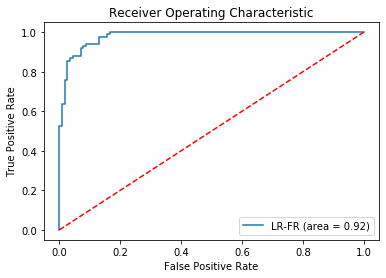

In [143]:
plt.figure()
plt.plot(fpr,tpr, label="LR-FR (area = %0.2f)" % logit_ROC_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel ('False Positive Rate')
plt.ylabel ("True Positive Rate")
plt.title ("Receiver Operating Characteristic")
plt.legend (loc='lower right',)
plt.show()

## Part 08 - Area Calculation of Each Susceptibility Class

In [148]:
Count_Susceptibility_Classes_Pixcel = pd.value_counts(DetilUnitlahan['Kerawanan'])
Count_Susceptibility_Classes_Pixcel

Sangat Tinggi    244575
Sangat Rendah    241196
Tinggi            71587
Rendah            42752
Sedang            34519
Name: Kerawanan, dtype: int64

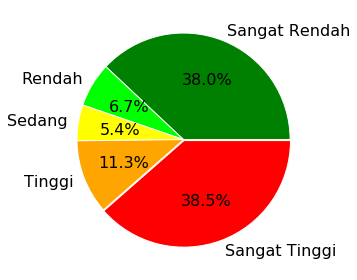

In [149]:
#Precentage of LR Susceptibility Map
x1 = 100*241196/634629
x2 = 100*42752/634629
x3 = 100*34519/634629
x4 = 100*71587/634629
x5 = 100*244575/634629
LSI = pd.DataFrame({'Landslide Susceptibility': ['Sangat Rendah','Rendah', 'Sedang', 'Tinggi',
                                       'Sangat Tinggi'],
                         'Percentage': [x1, x2, x3, x4, x5]},
                         index=[1, 2, 3, 4, 5])

#Layout
plt.pie(LSI['Percentage'], labels=LSI['Landslide Susceptibility'], textprops={'fontsize': 16}, 
    autopct='%0.1f%%', shadow=False, explode=[0,0,0,0,0.01], 
        wedgeprops={'edgecolor': 'white', "linewidth":1},
       colors =['green','lime','yellow','orange','red'])
plt.tight_layout()
plt.savefig('LR Susceptibility Area.png', format='png', dpi =1200)  